In [1]:
import sys
import os

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))




In [2]:
from src.data_loader import load_stock_data
filepath = (r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\META_historical_data.csv')
df_meta = load_stock_data(filepath)
print(df_meta.head())

✅ Pandas valid dates: 2926 / 2926
✅ Total valid after dateutil: 2926 / 2926
                  Date       Open       High        Low      Close  Adj Close  \
0  2012-12-12 00:00:00  28.000000  28.139999  27.370001  27.580000  27.523441   
1  2012-12-13 00:00:00  27.590000  28.750000  27.430000  28.240000  28.182087   
2  2012-12-14 00:00:00  28.180000  28.330000  26.760000  26.809999  26.755020   
3  2012-12-17 00:00:00  26.770000  27.000000  26.320000  26.750000  26.695143   
4  2012-12-18 00:00:00  26.959999  27.910000  26.900000  27.709999  27.653173   

     Volume  Dividends  Stock Splits  
0  46704200        0.0           0.0  
1  81051600        0.0           0.0  
2  91631600        0.0           0.0  
3  57742500        0.0           0.0  
4  60512900        0.0           0.0  


In [3]:
print("Null values count per column:")
print(df_meta.isnull().sum())


Null values count per column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


no valuse is null. ready to go!

In [4]:
df_meta.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2.926000e+03,2926.000000,2926.0
mean,179.557215,181.875331,177.317761,179.649453,179.305921,2.872083e+07,0.000342,0.0
std,108.864895,110.256219,107.511134,108.906971,108.755055,2.269811e+07,0.013070,0.0
min,22.990000,23.090000,22.670000,22.900000,22.853037,5.467500e+06,0.000000,0.0
25%,97.767502,98.772499,95.889997,97.382498,97.182795,1.571308e+07,0.000000,0.0
50%,166.870003,168.850006,164.210007,166.855003,166.512825,2.176100e+07,0.000000,0.0
75%,231.450005,234.934998,228.687504,232.424999,231.948360,3.294468e+07,0.000000,0.0
max,542.349976,542.809998,528.359985,539.909973,539.909973,3.654579e+08,0.500000,0.0


In [5]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'META': df_meta,
}

print_all_date_ranges(stock_dfs)

META: 2012-12-12 to 2024-07-30


In [6]:
# Assume your DataFrame is called df_news
# AMETA headline date range: 2020-03-09 to 2020-06-10

df_meta_news = df_meta[
    (df_meta['Date'] >= '2020-02-19') &
    (df_meta['Date'] <= '2020-06-10')
]


In [7]:
from src.missing_date import find_missing_dates
missing_dates = find_missing_dates(
   df_meta,
    date_col='Date',
    start_date='2020-02-19',
    end_date='2020-06-10',
    freq='D'
)

print("Missing dates:")
print(missing_dates)
print(f"Total missing: {len(missing_dates)}")

Missing dates:
DatetimeIndex(['2020-02-22', '2020-02-23', '2020-02-29', '2020-03-01',
               '2020-03-07', '2020-03-08', '2020-03-14', '2020-03-15',
               '2020-03-21', '2020-03-22', '2020-03-28', '2020-03-29',
               '2020-04-04', '2020-04-05', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-18', '2020-04-19', '2020-04-25',
               '2020-04-26', '2020-05-02', '2020-05-03', '2020-05-09',
               '2020-05-10', '2020-05-16', '2020-05-17', '2020-05-23',
               '2020-05-24', '2020-05-25', '2020-05-30', '2020-05-31',
               '2020-06-06', '2020-06-07'],
              dtype='datetime64[ns]', freq=None)
Total missing: 34


In [8]:
from src.missing_date import download_missing_yfinance_data

download_missing_yfinance_data(missing_dates, ticker_symbol='META', show_empty=True)


$META: possibly delisted; no price data found  (1d 2020-02-22 00:00:00 -> 2020-02-23 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-02-23 00:00:00 -> 2020-02-24 00:00:00)


No data for 2020-02-22 00:00:00
No data for 2020-02-23 00:00:00


$META: possibly delisted; no price data found  (1d 2020-02-29 00:00:00 -> 2020-03-01 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-03-01 00:00:00 -> 2020-03-02 00:00:00)


No data for 2020-02-29 00:00:00
No data for 2020-03-01 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-07 00:00:00 -> 2020-03-08 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-03-08 00:00:00 -> 2020-03-09 00:00:00)


No data for 2020-03-07 00:00:00
No data for 2020-03-08 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-14 00:00:00 -> 2020-03-15 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-03-15 00:00:00 -> 2020-03-16 00:00:00)


No data for 2020-03-14 00:00:00
No data for 2020-03-15 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-21 00:00:00 -> 2020-03-22 00:00:00)


No data for 2020-03-21 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-22 00:00:00 -> 2020-03-23 00:00:00)


No data for 2020-03-22 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-28 00:00:00 -> 2020-03-29 00:00:00)


No data for 2020-03-28 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-29 00:00:00 -> 2020-03-30 00:00:00)


No data for 2020-03-29 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-04 00:00:00 -> 2020-04-05 00:00:00)


No data for 2020-04-04 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-05 00:00:00 -> 2020-04-06 00:00:00)


No data for 2020-04-05 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-10 00:00:00 -> 2020-04-11 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-04-11 00:00:00 -> 2020-04-12 00:00:00)


No data for 2020-04-10 00:00:00
No data for 2020-04-11 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-12 00:00:00 -> 2020-04-13 00:00:00)


No data for 2020-04-12 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-18 00:00:00 -> 2020-04-19 00:00:00)


No data for 2020-04-18 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-19 00:00:00 -> 2020-04-20 00:00:00)


No data for 2020-04-19 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-25 00:00:00 -> 2020-04-26 00:00:00)


No data for 2020-04-25 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-26 00:00:00 -> 2020-04-27 00:00:00)


No data for 2020-04-26 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-02 00:00:00 -> 2020-05-03 00:00:00)


No data for 2020-05-02 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-03 00:00:00 -> 2020-05-04 00:00:00)


No data for 2020-05-03 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-09 00:00:00 -> 2020-05-10 00:00:00)


No data for 2020-05-09 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-10 00:00:00 -> 2020-05-11 00:00:00)


No data for 2020-05-10 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-16 00:00:00 -> 2020-05-17 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-05-17 00:00:00 -> 2020-05-18 00:00:00)


No data for 2020-05-16 00:00:00
No data for 2020-05-17 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-23 00:00:00 -> 2020-05-24 00:00:00)


No data for 2020-05-23 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-24 00:00:00 -> 2020-05-25 00:00:00)


No data for 2020-05-24 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-25 00:00:00 -> 2020-05-26 00:00:00)


No data for 2020-05-25 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-30 00:00:00 -> 2020-05-31 00:00:00)


No data for 2020-05-30 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-31 00:00:00 -> 2020-06-01 00:00:00)


No data for 2020-05-31 00:00:00


$META: possibly delisted; no price data found  (1d 2020-06-06 00:00:00 -> 2020-06-07 00:00:00)


No data for 2020-06-06 00:00:00


$META: possibly delisted; no price data found  (1d 2020-06-07 00:00:00 -> 2020-06-08 00:00:00)


No data for 2020-06-07 00:00:00


{}

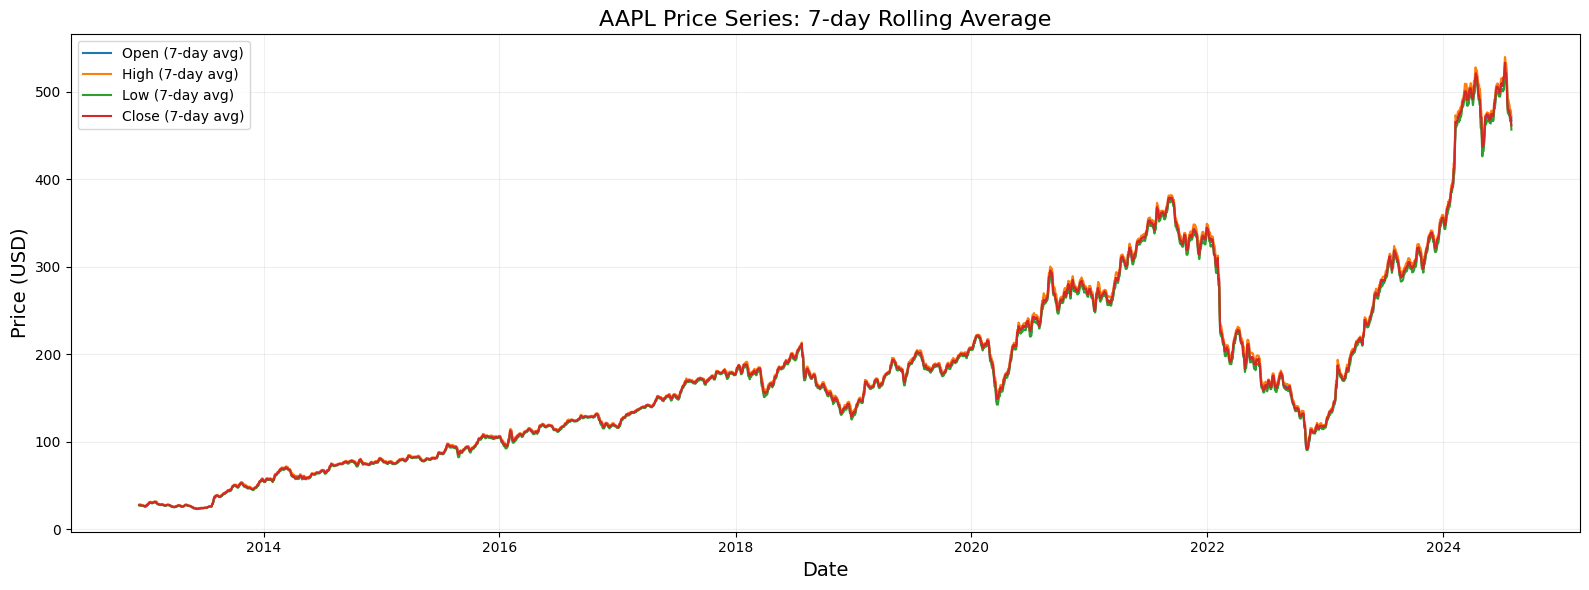

In [9]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_meta, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("AAPL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


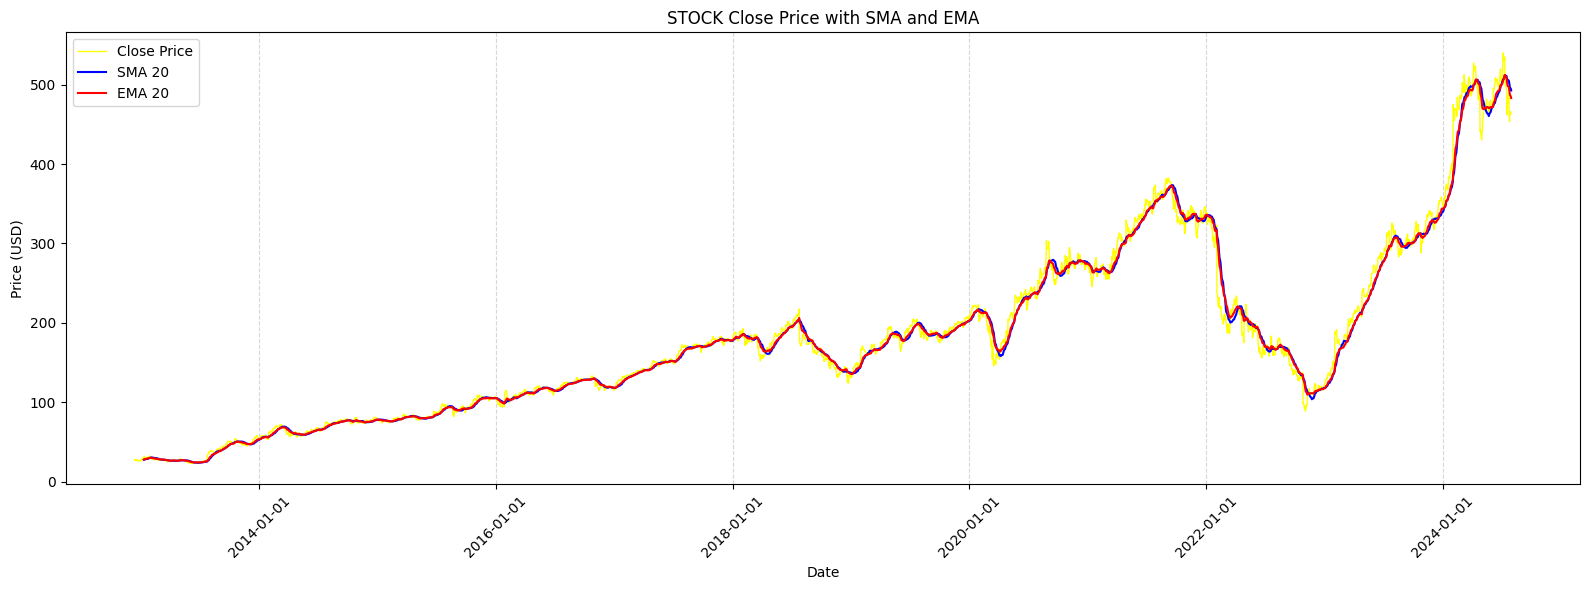

In [10]:
from src.plot_ma import plot_ma
plot_ma(df_meta, 'Close')

## Interpreting Technical Indicators with TA-Lib: SMA, EMA, and Price Trend

The graph above overlays three key lines for META stock:
- **Close Price** (black): The actual market closing price of META for each trading day.
- **SMA 20** (blue): The 20-day Simple Moving Average, which calculates the unweighted average of the previous 20 closing prices for each point in time.
- **EMA 20** (red): The 20-day Exponential Moving Average, which is similar to the SMA but gives more weight to recent prices, making it more responsive to new market information.

**TA-Lib** is a widely-used library for financial technical analysis. It computes indicators like SMA and EMA, which traders and analysts use to understand price trends, identify potential buy or sell signals, and smooth out short-term volatility in market data.

##### Both the SMA and EMA are trending up, confirming a bullish trend.

The lines stay in order: yellow (price) > red (EMA) > blue (SMA), a classic sign of a strong and established uptrend.

**Signals:**
When the price crosses above the moving averages, it’s often seen as a “buy” signal.
When it’s below, it’s a “sell” signal.

**Momentum:**
The bigger the gap between the yellow line and the moving averages, the stronger the trend (but sometimes this can mean the stock is “overbought” and may pull back soon).


### Key Insights from the Plot:
### 1. Early Period (February to mid-March 2020)

**Sharp Downtrend:**  
The price (yellow) falls steeply from around \$220 to about \$150, indicating a rapid selloff (likely the COVID-19 crash period).

Both SMA and EMA follow the drop, but EMA (red) reacts slightly quicker than SMA (blue).

---

### 2. Bottoming and Recovery (Late March to April)

The price bottoms out and begins a recovery, moving upward after mid-March.

The EMA turns up before the SMA, signaling early momentum in the rebound.

---

### 3. Sustained Uptrend (April to June)

The closing price rises steadily, from around \$160 to above \$230 by June.

Price stays above both SMA and EMA for most of this period, showing strong bullish momentum.

The gap widens between the closing price and the moving averages, a classic sign of a strong uptrend.

---

### What Does This Mean for Analysis?

**Trend Change Detection:**  
When the closing price crosses above the SMA and EMA, and both moving averages turn up, it’s a strong signal that a new uptrend has begun.  
The EMA, reacting faster, is useful for early detection of these turns.

**Momentum:**  
The larger the gap between the price and the averages, the stronger the trend—but this can also mean the price is “overbought” and due for a short pause or pullback.

**Bearish to Bullish Transition:**  
This chart captures a dramatic shift from bearish (downtrend) to bullish (uptrend), which is important for both trading strategies and machine learning feature engineering.

---

### Summary Statement

This chart of META shows a sharp fall followed by a strong and sustained recovery. The moving averages confirm and support the trend, with EMA (red) giving earlier signals. These patterns are important for spotting turning points and measuring the strength of trends—key features in technical analysis or data-driven stock modeling.





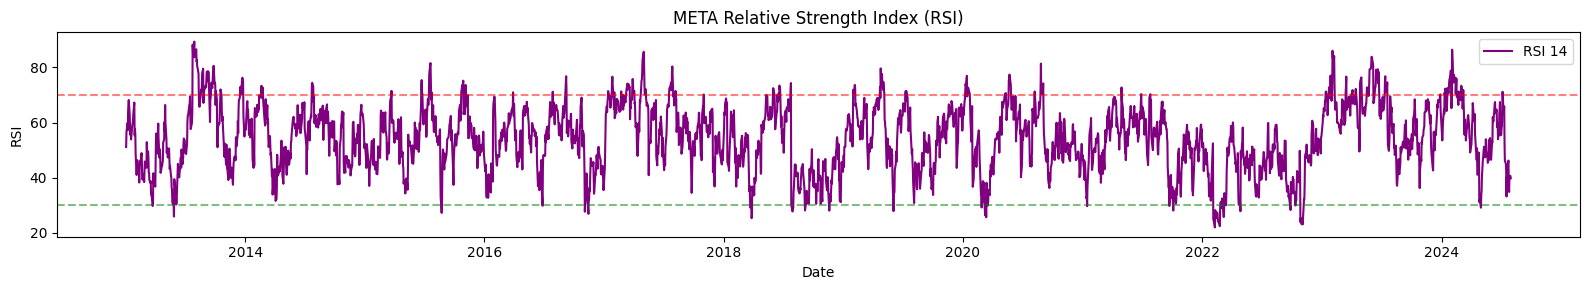

In [11]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_meta, price_col='Close', ticker_name='META')

### Graph Interpretation: META Relative Strength Index (RSI) (2013–2024)

- **Date Range:** This RSI chart tracks META (Facebook) from early 2013 to mid-2024, providing a long-term view of price momentum and relative strength.
- **What’s shown:**  
  - The purple line is the 14-day RSI.
  - The red dashed line at 70 marks the “overbought” threshold.
  - The green dashed line at 30 marks the “oversold” threshold.

#### Observations by period:

- **2013–2017:**  
  RSI is highly volatile, with frequent sharp spikes above 70 (overbought) and drops below 30 (oversold). This indicates periods of intense buying and selling pressure, suggesting that META experienced frequent swings in price momentum during its earlier years.
- **2018–2021:**  
  The RSI remains mostly between 40 and 70, with occasional forays into the overbought zone but fewer dips below 30. This reflects somewhat more stable momentum, but still with regular overbought signals.
- **2022–2024:**  
  Volatility increases again, with more pronounced swings. There are multiple periods where the RSI pushes above 70 or falls below 30, especially during broad market selloffs or strong rallies.

#### Overall pattern:

- The RSI oscillates frequently between overbought (>70) and oversold (<30) levels throughout the 11-year period.
- Sustained periods above 70 typically align with META price rallies or market euphoria, while dips below 30 correspond to corrections or market stress.
- The most recent years (2022–2024) show a return to higher volatility and larger RSI swings, reflecting increased uncertainty or stronger price movements.

**Summary:**  
This long-term RSI chart highlights META’s repeated cycles of overbought and oversold momentum, with phases of both stability and high volatility. RSI signals have occurred regularly, underlining the dynamic and sometimes speculative nature of META’s price action over the last decade.


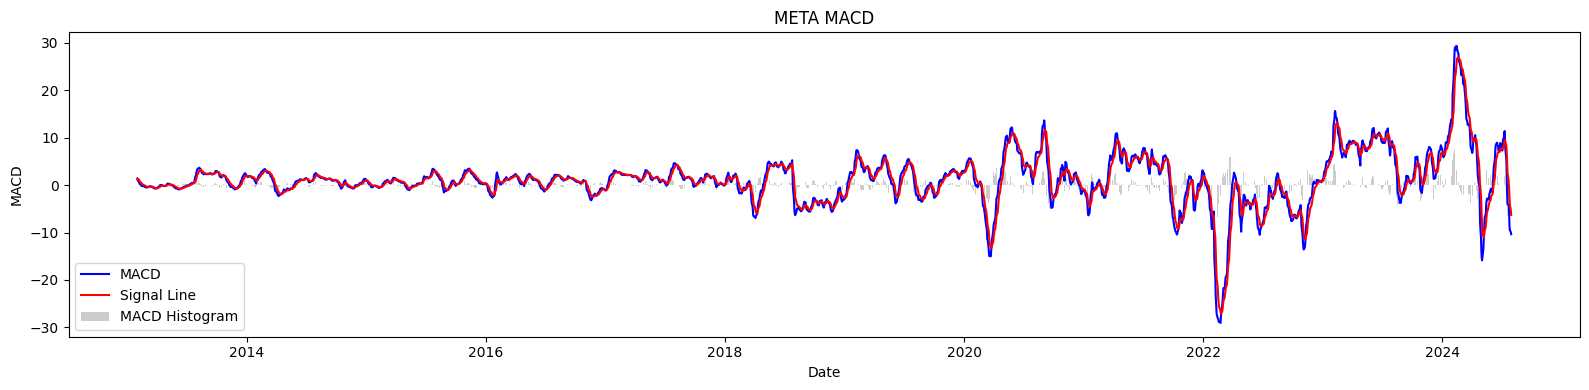

In [12]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_meta, price_col='Close', ticker_name='META')

### Graph Interpretation: META MACD (2013–2024)

- **Date Range:** The chart displays the MACD for META (Facebook) from 2013 through mid-2024.
- **What’s shown:**  
  - **Blue line:** MACD (difference between two exponential moving averages), reflecting momentum and trend strength.
  - **Red line:** Signal line, a moving average of the MACD.
  - **Gray bars:** MACD histogram (difference between MACD and signal line), visualizing momentum shifts.

#### Timeline observations:

- **2013–2017:**  
  The MACD and signal line generally remain close to zero, with only modest movements and infrequent, shallow swings. This suggests mostly stable trends and mild momentum in META stock during its earlier years.
- **2018–2019:**  
  Larger swings start to appear, with occasional negative and positive peaks, showing increased price volatility and bigger trend shifts.
- **2020–2021:**  
  MACD becomes noticeably more volatile, with more pronounced peaks and troughs. This period aligns with global market disruptions and heightened trading activity, possibly including the COVID-19 pandemic.
- **2022–2024:**  
  Volatility reaches its highest levels, with frequent, large spikes both above and below zero. The MACD and signal line diverge sharply at times, and the histogram bars become much taller and wider.


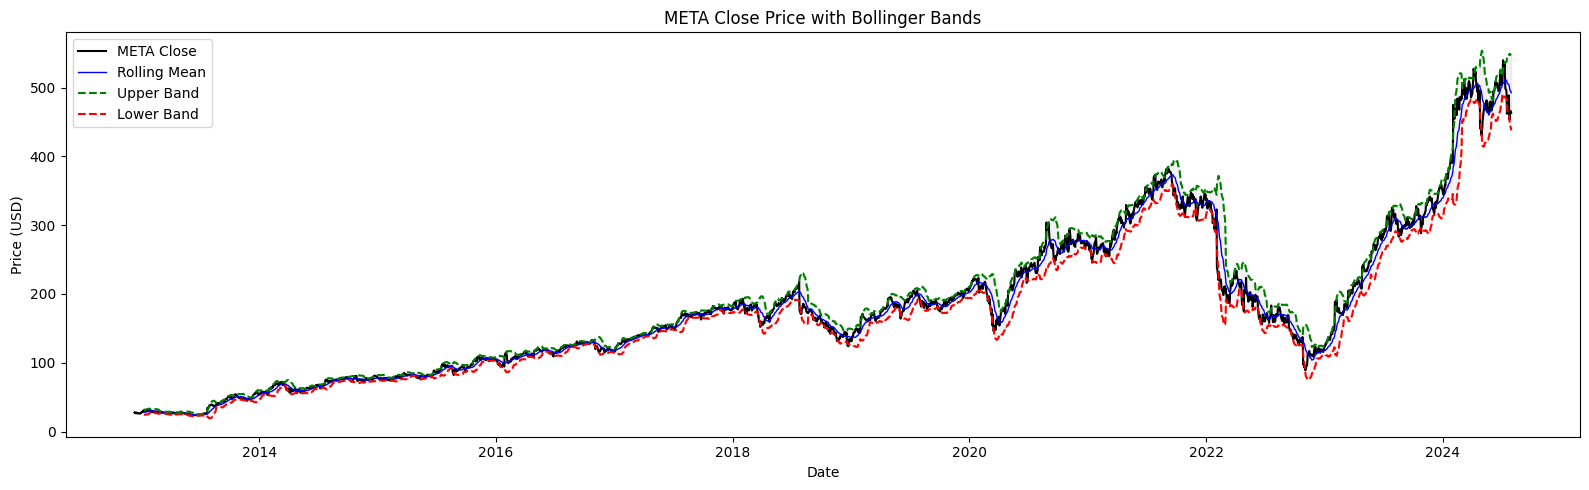

In [16]:
from src.plot_bolinger import plot_bollinger_bands

# Example usage (for AAPL)
plot_bollinger_bands(df_meta, column='Close', stock_name='META')

### Graph Interpretation: META Close Price with Bollinger Bands (2013–2024)

- **Date Range:** The chart covers META (Facebook) from 2013 to 2024.
- **What’s shown:**  
  - **Black line:** Daily closing price of META.
  - **Blue line:** Rolling mean (center line of the bands).
  - **Green dashed line:** Upper Bollinger Band (rolling mean + 2 standard deviations).
  - **Red dashed line:** Lower Bollinger Band (rolling mean - 2 standard deviations).

#### Observations by period:

- **2013–2018:**  
  META’s price steadily rises, with only mild corrections. The closing price repeatedly touches or moves along the upper band, signaling persistent bullish momentum.
- **2018–2021:**  
  The price continues climbing but with more pronounced swings. The Bollinger Bands expand during periods of high volatility (e.g., sharp upward surges or pullbacks), and contract during quieter times.
- **2022:**  
  A major correction occurs. The closing price falls rapidly, dipping close to or below the lower band. The bands widen sharply during this drawdown, indicating elevated volatility.
- **2023–2024:**  
  META’s price rebounds strongly, reaching new highs and frequently approaching or exceeding the upper band. The bands remain wide, reflecting ongoing volatility and rapid price increases.

#### General insights:

- **Touching the Upper Band:** When the price hugs or breaks above the upper band (e.g., late 2023–2024), it often reflects strong upward momentum, but can also signal overbought conditions.
- **Touching the Lower Band:** When the price falls toward or below the lower band (e.g., 2022), it often reflects periods of selling pressure or oversold conditions.
- **Band Width:** The width of the bands expands during times of high volatility and contracts during calm, trending periods.

**Summary:**  
Over the last decade, META’s price has shown long periods of growth, sharp corrections, and major rebounds. The Bollinger Bands highlight both the persistence of trends and the scale of volatility, with wide bands during market shocks and strong rallies, and narrower bands during steady climbs.
